In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('TaxiFare.csv')

In [3]:
df.shape

(50000, 8)

In [4]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
34310,43:00.0,21.5,2014-11-23 01:43:00 UTC,-73.988530,40.746080,-73.960090,40.814900,1
12021,49:00.0,13.3,2011-12-20 12:49:00 UTC,-74.003330,40.748125,-73.969400,40.761973,5
43987,41:16.0,6.9,2011-09-15 08:41:16 UTC,-73.998071,40.682562,-73.983417,40.684851,1
46232,59:15.0,3.7,2010-12-12 08:59:15 UTC,-73.977129,40.758952,-73.977848,40.753784,1
4047,06:00.0,8.5,2012-07-15 03:06:00 UTC,0.000000,0.000000,0.000000,0.000000,1
2577,01:00.0,16.5,2011-07-03 08:01:00 UTC,-74.015765,40.711095,-73.980835,40.752002,5
8346,29:20.0,4.5,2012-03-22 10:29:20 UTC,-73.975537,40.741045,-73.979095,40.748611,1
43966,46:03.0,24.0,2013-11-30 17:46:03 UTC,-74.001874,40.755705,-73.965231,40.712683,1
45773,02:37.0,8.0,2014-10-16 11:02:37 UTC,-73.991661,40.756175,-73.976967,40.763425,1
18410,33:00.0,4.0,2013-03-17 21:33:00 UTC,-74.009905,40.721187,-74.003723,40.719213,2


In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
uniqueIsDigit=pd.DataFrame(df.unique_id.str.isdigit())
df[uniqueIsDigit['unique_id']==False]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [8]:
uniqueIsDigit=pd.DataFrame(df.date_time_of_pickup.str.isdigit())
df[uniqueIsDigit['date_time_of_pickup']==False]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [9]:
df['date_time_of_pickup']=pd.to_numeric(df['date_time_of_pickup'],errors='coerce')

In [10]:
print(df['unique_id'].dtype)

object


In [11]:
df['unique_id']=pd.to_numeric(df['unique_id'],errors='coerce')

In [12]:
print(df.dtypes)

unique_id               float64
amount                  float64
date_time_of_pickup     float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object


In [13]:
df.dtypes

unique_id               float64
amount                  float64
date_time_of_pickup     float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             0 non-null      float64
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   0 non-null      float64
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.1 MB


In [15]:
df.head(20)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,NaN,4.5,NaN,-73.844311,40.721319,-73.841610,40.712278,1
1,NaN,16.9,NaN,-74.016048,40.711303,-73.979268,40.782004,1
2,NaN,5.7,NaN,-73.982738,40.761270,-73.991242,40.750562,2
3,NaN,7.7,NaN,-73.987130,40.733143,-73.991567,40.758092,1
4,NaN,5.3,NaN,-73.968095,40.768008,-73.956655,40.783762,1
5,NaN,12.1,NaN,-74.000964,40.731630,-73.972892,40.758233,1
6,NaN,7.5,NaN,-73.980002,40.751662,-73.973802,40.764842,1
7,NaN,16.5,NaN,-73.951300,40.774138,-73.990095,40.751048,1
8,NaN,9.0,NaN,-74.006462,40.726713,-73.993078,40.731628,1
9,NaN,8.9,NaN,-73.980658,40.733873,-73.991540,40.758138,2


In [16]:
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)

In [17]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [18]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [19]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [20]:
#duplicates
duplicate=df.duplicated()
duplicate.sum()

636

In [21]:
duplicate_rows=df[df.duplicated()]

In [22]:
duplicate_rows

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
568,6.5,0.0,0.0,0.0,0.0,1
872,8.5,0.0,0.0,0.0,0.0,1
881,8.5,0.0,0.0,0.0,0.0,1
1316,8.5,0.0,0.0,0.0,0.0,1
1595,8.5,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
49565,7.7,0.0,0.0,0.0,0.0,1
49625,12.1,0.0,0.0,0.0,0.0,1
49816,4.9,0.0,0.0,0.0,0.0,1
49856,10.9,0.0,0.0,0.0,0.0,5


In [23]:
df=df.drop_duplicates()

In [24]:
duplicate=df.duplicated()
duplicate.sum()

0

In [25]:
df.shape

(49364, 6)

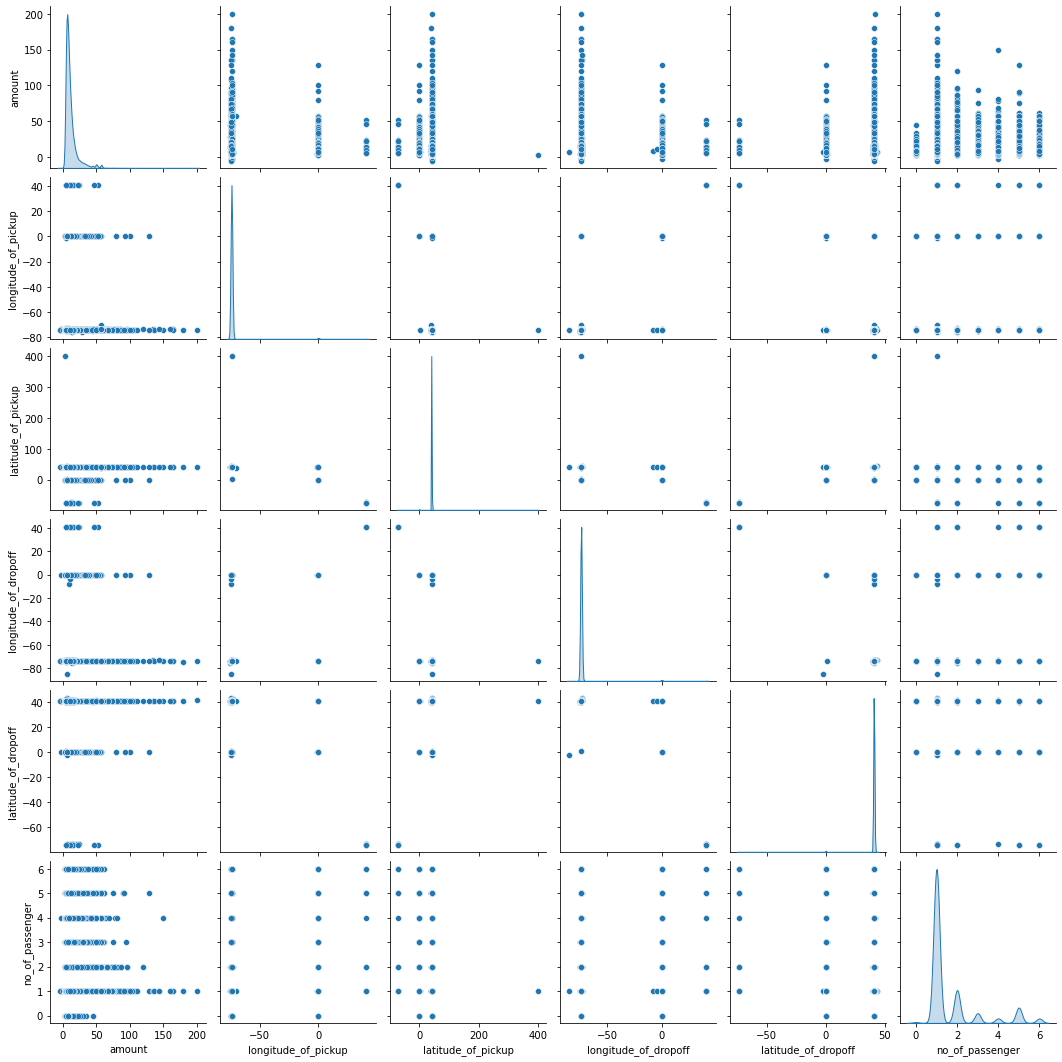

In [26]:
sns.pairplot(df,diag_kind="kde")

# SPLIT DATA

In [27]:
X=df.drop(['amount'],axis=1)
y=df[['amount']]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=56)

In [29]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.score(X_train,y_train)

0.002559373138310006

In [31]:
model.score(X_test,y_test)

0.0010553252914146105

In [32]:
predictions=model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y_test,predictions)

83.92897064834703

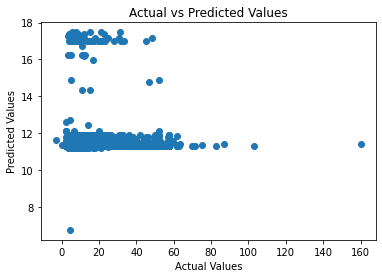

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R-sqaured Score:",r2)

Mean Squared Error: 83.92897064834703
Mean Absolute Error: 5.896052468563353
R-sqaured Score: 0.0010553252914146105
